In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# BCE classifier

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
from pytorch_inferno.model_wrapper import ModelWrapper
from pytorch_inferno.callback import *
from pytorch_inferno.data import get_paper_data
from pytorch_inferno.plotting import *
from pytorch_inferno.inference import *
from pytorch_inferno.utils import *

from fastcore.all import partialler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from typing import *
from collections import OrderedDict

import torch.nn as nn
from torch import optim
import torch
from torch import Tensor
from torch import autograd

In [ ]:
net = nn.Sequential(nn.Linear(3,100),  nn.ReLU(),
                    nn.Linear(100,100),nn.ReLU(),
                    nn.Linear(100,1),  nn.Sigmoid())
init_net(net)

In [ ]:
model = ModelWrapper(net)

data, test = get_paper_data(200000, bm=0, bs=32, n_test=1000000)

In [ ]:
model.fit(200, data=data, opt=partialler(optim.SGD,lr=2e-3), loss=nn.BCELoss(),
          cbs=[LossTracker(),SaveBest('weights/best.h5'),EarlyStopping(5)])

model.save('weights/BCE_Test.h5')

1: Train=0.3929350734615326 Valid=0.3533997430419922
2: Train=0.3428666669535637 Valid=0.3392838264608383
3: Train=0.33703843059420585 Valid=0.337627055850029
4: Train=0.3358436953032017 Valid=0.3372601434993744
5: Train=0.33525460687756536 Valid=0.3367564226770401
6: Train=0.3348833509504795 Valid=0.3359000786161423
7: Train=0.3346021106350422 Valid=0.3357079481935501
8: Train=0.33429210242152213 Valid=0.33539626185417176
9: Train=0.3339586520969868 Valid=0.335367881603241
10: Train=0.3337059416949749 Valid=0.33471191918373105
11: Train=0.3335008493721485 Valid=0.33595116535663605
12: Train=0.33324935972690584 Valid=0.3361800316762924
13: Train=0.33307586876392364 Valid=0.33485937933444976
14: Train=0.33287537781715393 Valid=0.33491533747673036
15: Train=0.33275036828994753 Valid=0.33470407435417177
16: Train=0.3326913898408413 Valid=0.33388066996097565
17: Train=0.3325934296643734 Valid=0.33444666235923765
18: Train=0.33246899418115616 Valid=0.33404065371513364
19: Train=0.3323910059

In [ ]:
model.load('weights/BCE_Test.h5')

## BM 0

In [ ]:
preds = model.predict(test)

In [ ]:
preds

array([[8.5615486e-01],
       [8.5475934e-01],
       [7.6029247e-01],
       ...,
       [1.5456634e-04],
       [9.4336079e-04],
       [3.9262832e-03]], dtype=float32)

In [ ]:
df = pd.DataFrame({'pred':preds.squeeze()})
df['gen_target'] = test.dataset.y
df.head()

,pred,gen_target
0,0.856155,1.0
1,0.854759,1.0
2,0.760292,1.0
3,0.797154,1.0
4,0.781631,1.0


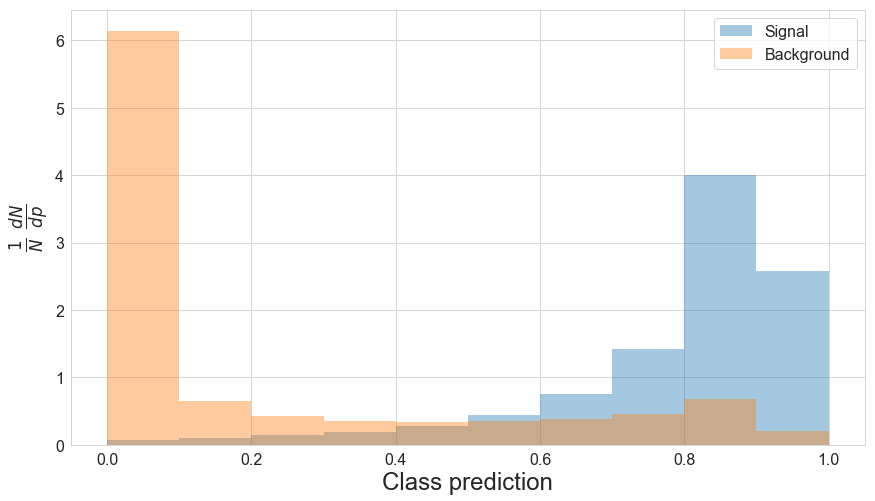

In [ ]:
plot_preds(df)

In [ ]:
bin_preds(df, np.linspace(0,1,11))

In [ ]:
df.head()

,pred,gen_target,pred_bin
0,0.856155,1.0,8
1,0.854759,1.0,8
2,0.760292,1.0,7
3,0.797154,1.0,7
4,0.781631,1.0,7


In [ ]:
f_s,f_b = get_shape(df,1),get_shape(df,0)

In [ ]:
f_s.sum(), f_b.sum()

(tensor(1.), tensor(1.))

In [ ]:
f_s, f_b

(tensor([1.7488e-02, 1.4286e-02, 1.9510e-02, 2.8422e-02, 4.4488e-02, 7.5072e-02,
         1.4210e-01, 4.0028e-01, 2.5836e-01, 2.0000e-13]),
 tensor([6.7883e-01, 4.3012e-02, 3.6016e-02, 3.3798e-02, 3.5098e-02, 3.8568e-02,
         4.5984e-02, 6.8342e-02, 2.0350e-02, 2.0000e-13]))

In [ ]:
asimov = (50*f_s)+(1000*f_b)

In [ ]:
asimov, asimov.sum()

(tensor([6.7971e+02, 4.3726e+01, 3.6991e+01, 3.5219e+01, 3.7322e+01, 4.2322e+01,
         5.3089e+01, 8.8356e+01, 3.3268e+01, 2.1000e-10]), tensor(1050.))

In [ ]:
n = 1050
x = np.linspace(20,80,61)
y = np.zeros_like(x)
for i,m in enumerate(x):
    pois = torch.distributions.Poisson((m*f_s)+(1000*f_b))
    y[i] = -pois.log_prob(asimov).sum()
y

array([28.94020844, 28.78258514, 28.63143921, 28.48635864, 28.34823608,
       28.21559143, 28.08921051, 27.96884918, 27.85441589, 27.74549866,
       27.64263153, 27.54560852, 27.45404816, 27.36792755, 27.2869873 ,
       27.21168518, 27.14147186, 27.07720947, 27.01760864, 26.96337128,
       26.91348267, 26.86928558, 26.82971191, 26.7950592 , 26.76520538,
       26.73986816, 26.71989441, 26.70381927, 26.69263458, 26.68591309,
       26.68344879, 26.68565369, 26.69244385, 26.70340729, 26.71852112,
       26.7379837 , 26.76134491, 26.78907776, 26.8210907 , 26.85700989,
       26.89690399, 26.94052887, 26.98881531, 27.039711  , 27.09570312,
       27.15500641, 27.21814728, 27.28514099, 27.35569   , 27.42955017,
       27.50737762, 27.58866882, 27.67329407, 27.76223755, 27.85385895,
       27.94921875, 28.04792786, 28.15032959, 28.25582886, 28.36433411,
       28.47647095])

In [ ]:
y_tf2 = np.array([31.626238,31.466385,31.313095,31.166267,31.025808,30.891619,30.76361
,30.641693,30.525778,30.415783,30.31162,30.213215,30.120483,30.033348
,29.951736,29.875574,29.804789,29.739307,29.679066,29.623993,29.574026
,29.5291,29.489151,29.454117,29.423939,29.398558,29.377914,29.361954
,29.35062,29.343859,29.341618,29.343842,29.350483,29.36149,29.376812
,29.396404,29.420216,29.448202,29.480318,29.516518,29.556757,29.600994
,29.649185,29.70129,29.757267,29.817076,29.88068,29.948036,30.019108
,30.093859,30.17225,30.25425,30.339819,30.42892,30.521524,30.617598
,30.7171,30.820007,30.926281,31.035892,31.148808], dtype='float32')

In [ ]:
y_tf2-y_tf2.min()

array([2.2846203e+00, 2.1247673e+00, 1.9714775e+00, 1.8246498e+00,
       1.6841908e+00, 1.5500011e+00, 1.4219933e+00, 1.3000755e+00,
       1.1841602e+00, 1.0741653e+00, 9.7000313e-01, 8.7159729e-01,
       7.7886581e-01, 6.9173050e-01, 6.1011887e-01, 5.3395653e-01,
       4.6317101e-01, 3.9768982e-01, 3.3744812e-01, 2.8237534e-01,
       2.3240852e-01, 1.8748283e-01, 1.4753342e-01, 1.1249924e-01,
       8.2321167e-02, 5.6940079e-02, 3.6296844e-02, 2.0336151e-02,
       9.0026855e-03, 2.2411346e-03, 0.0000000e+00, 2.2239685e-03,
       8.8653564e-03, 1.9872665e-02, 3.5194397e-02, 5.4786682e-02,
       7.8598022e-02, 1.0658455e-01, 1.3870049e-01, 1.7490005e-01,
       2.1513939e-01, 2.5937653e-01, 3.0756760e-01, 3.5967255e-01,
       4.1564941e-01, 4.7545815e-01, 5.3906250e-01, 6.0641861e-01,
       6.7749023e-01, 7.5224113e-01, 8.3063316e-01, 9.1263199e-01,
       9.9820137e-01, 1.0873032e+00, 1.1799068e+00, 1.2759800e+00,
       1.3754826e+00, 1.4783897e+00, 1.5846634e+00, 1.6942749e

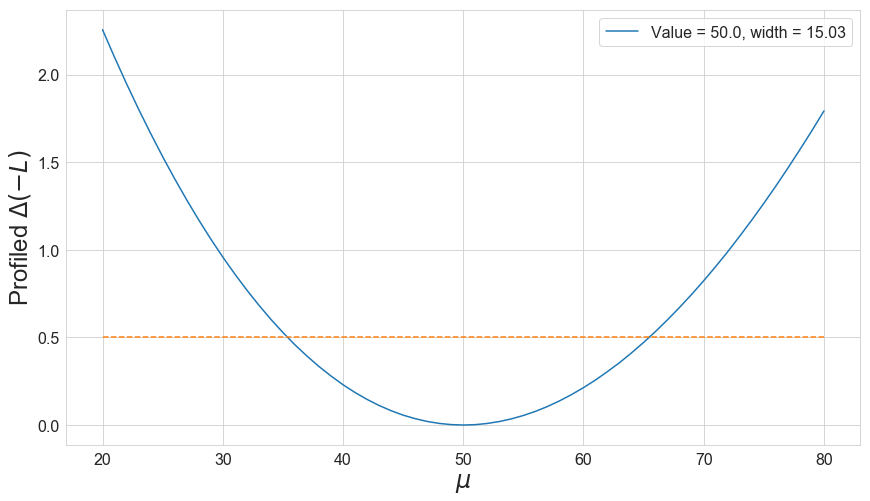

In [ ]:
plot_likelihood(y-y.min())

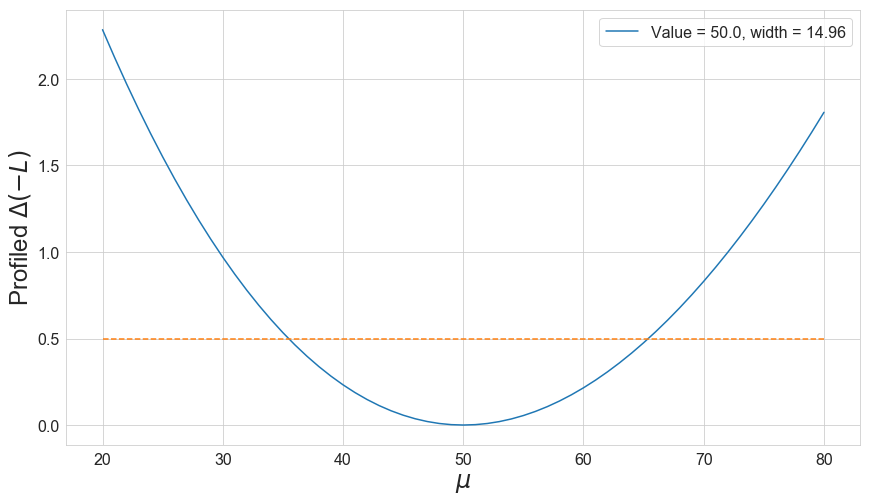

In [ ]:
plot_likelihood(y_tf2-y_tf2.min())

# Nuisances - via interpolation

In [ ]:
bkg = test.dataset.x[test.dataset.y.squeeze() == 0]
assert len(bkg) == 500000

In [ ]:
b_shapes = get_paper_syst_shapes(bkg, df, model=model, bins=np.linspace(0,1,11))

Running: r=-0.2


Running: r=0


Running: r=0.2


Running: l=2.5


Running: l=3


Running: l=3.5


In [ ]:
df

,pred,gen_target,pred_bin,pred_-0.2_3,pred_-0.2_3_bin,pred_0_3,pred_0_3_bin,pred_0.2_3,pred_0.2_3_bin,pred_0_2.5,pred_0_2.5_bin,pred_0_3.5,pred_0_3.5_bin
0,0.856155,1.0,8,0.856155,8,0.856155,8,0.856155,8,0.856155,8,0.856155,8
1,0.854759,1.0,8,0.854759,8,0.854759,8,0.854759,8,0.854759,8,0.854759,8
2,0.760292,1.0,7,0.760292,7,0.760292,7,0.760292,7,0.760292,7,0.760292,7
3,0.797154,1.0,7,0.797154,7,0.797154,7,0.797154,7,0.797154,7,0.797154,7
4,0.781631,1.0,7,0.781631,7,0.781631,7,0.781631,7,0.781631,7,0.781631,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.017362,0.0,0,0.020755,0,0.017362,0,0.014477,0,0.017178,0,0.017548,0
999996,0.493235,0.0,4,0.574630,5,0.493235,4,0.397488,3,0.485714,4,0.499141,4
999997,0.000155,0.0,0,0.000265,0,0.000155,0,0.000090,0,0.000124,0,0.000192,0
999998,0.000943,0.0,0,0.001382,0,0.000943,0,0.000650,0,0.000930,0,0.000957,0


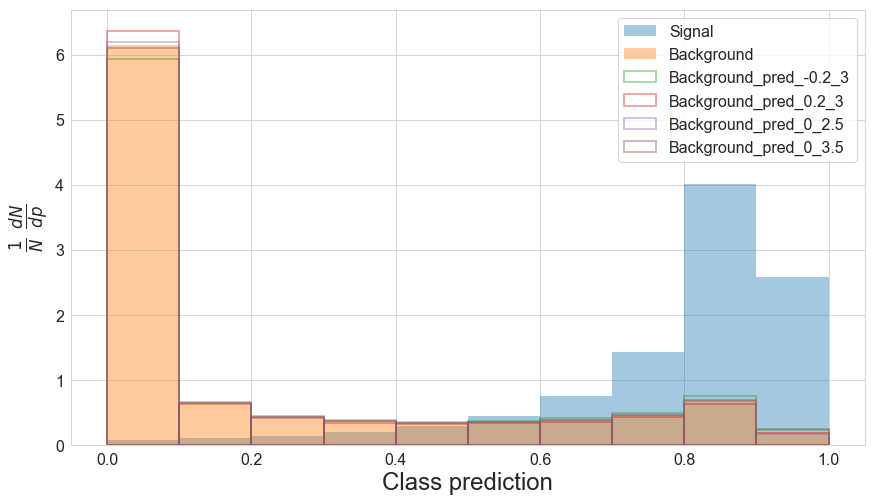

In [ ]:
plot_preds(df, pred_names=['pred', 'pred_-0.2_3', 'pred_0.2_3', 'pred_0_2.5', 'pred_0_3.5'])

In [ ]:
b_shapes['f_b_nom']

tensor([6.7883e-01, 4.3012e-02, 3.6016e-02, 3.3798e-02, 3.5098e-02, 3.8568e-02,
        4.5984e-02, 6.8342e-02, 2.0350e-02, 2.0000e-13])

In [ ]:
b_shapes['f_b_up']

tensor([[6.9945e-01, 4.1684e-02, 3.4280e-02, 3.2108e-02, 3.3148e-02, 3.5640e-02,
         4.2564e-02, 6.2726e-02, 1.8396e-02, 2.0000e-13],
        [6.7410e-01, 4.2890e-02, 3.6296e-02, 3.3630e-02, 3.4904e-02, 3.8754e-02,
         4.5712e-02, 6.8860e-02, 2.4852e-02, 2.0000e-13]])

In [ ]:
b_shapes['f_b_dw']

tensor([[6.5829e-01, 4.4888e-02, 3.7522e-02, 3.5380e-02, 3.6820e-02, 4.1226e-02,
         4.8938e-02, 7.4514e-02, 2.2424e-02, 2.0000e-13],
        [6.8346e-01, 4.3112e-02, 3.6120e-02, 3.3802e-02, 3.4944e-02, 3.8480e-02,
         4.6034e-02, 6.8110e-02, 1.5936e-02, 2.0000e-13]])

In [ ]:
f_s

tensor([1.7488e-02, 1.4286e-02, 1.9510e-02, 2.8422e-02, 4.4488e-02, 7.5072e-02,
        1.4210e-01, 4.0028e-01, 2.5836e-01, 2.0000e-13])

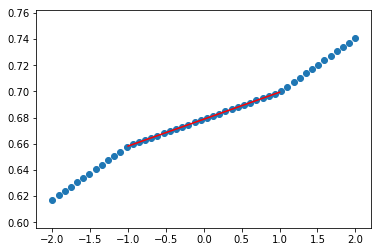

In [ ]:
i = 0
d = b_shapes['f_b_dw'][0][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][0][i]
interp = []
rs = np.linspace(-2,2)
for r in rs: interp.append(interp_shape(Tensor((r,0))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(rs, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

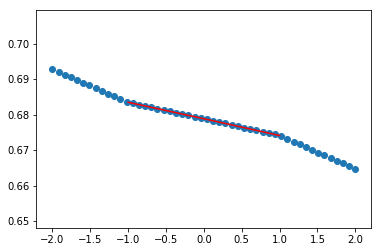

In [ ]:
i = 0
d = b_shapes['f_b_dw'][1][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][1][i]
interp = []
ls = np.linspace(-2,2)
for l in ls: interp.append(interp_shape(Tensor((0,l))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(ls, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

In [ ]:
b_shapes['f_b_nom']

tensor([6.7883e-01, 4.3012e-02, 3.6016e-02, 3.3798e-02, 3.5098e-02, 3.8568e-02,
        4.5984e-02, 6.8342e-02, 2.0350e-02, 2.0000e-13])

In [ ]:
alpha = Tensor((1,0))[None,:]
interp_shape(alpha, **b_shapes).squeeze()

tensor([6.9945e-01, 4.1684e-02, 3.4280e-02, 3.2108e-02, 3.3148e-02, 3.5640e-02,
        4.2564e-02, 6.2726e-02, 1.8396e-02, 2.0000e-13])

In [ ]:
b_shapes['f_b_up']

tensor([[6.9945e-01, 4.1684e-02, 3.4280e-02, 3.2108e-02, 3.3148e-02, 3.5640e-02,
         4.2564e-02, 6.2726e-02, 1.8396e-02, 2.0000e-13],
        [6.7410e-01, 4.2890e-02, 3.6296e-02, 3.3630e-02, 3.4904e-02, 3.8754e-02,
         4.5712e-02, 6.8860e-02, 2.4852e-02, 2.0000e-13]])

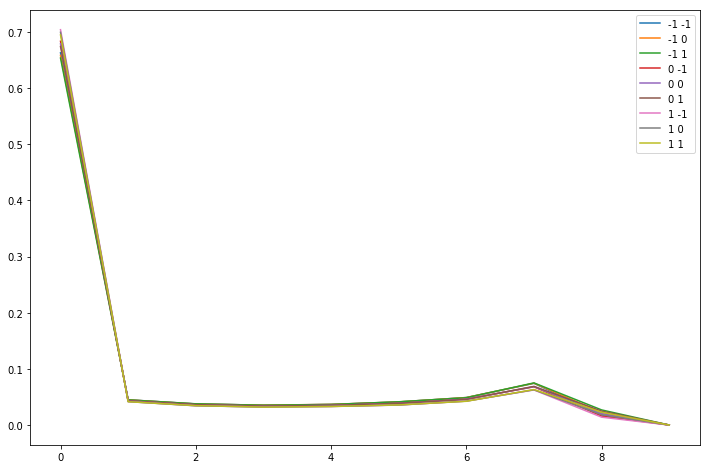

In [ ]:
fig = plt.figure(figsize=(12,8))
for r in [-1,0,1]:
    for l in [-1,0,1]:
        alpha = Tensor((r,l))[None,:]
        s = interp_shape(alpha, **b_shapes).squeeze()
        plt.plot(s, label=f'{r} {l}')
plt.legend()

# Newton

In [ ]:
profiler = partialler(calc_profile, n=1050, mu_scan=torch.linspace(20,80,61), true_mu=50)

## BM 1
r free, l fixed

In [ ]:
bm1_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                            ('f_b_up',  b_shapes['f_b_up'][0][None,:]),
                            ('f_b_dw',  b_shapes['f_b_dw'][0][None,:])])

In [ ]:
bm1_b_shapes['f_b_up'].shape

torch.Size([1, 10])

In [ ]:
nll = profiler(f_s=f_s, n_steps=100, **bm1_b_shapes)

In [ ]:
nll = to_np(nll)

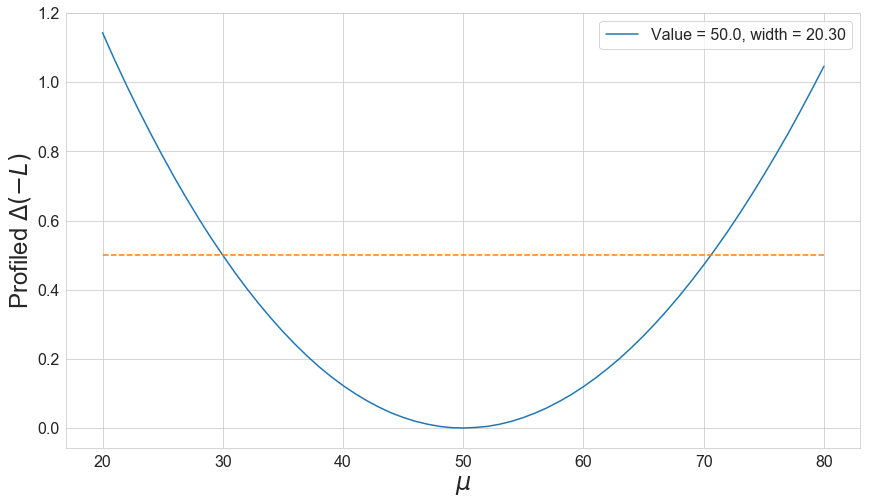

In [ ]:
plot_likelihood(nll-nll.min())

## BM 1l
r fixed, l free

In [ ]:
bm1l_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                             ('f_b_up',  b_shapes['f_b_up'][1][None,:]),
                             ('f_b_dw',  b_shapes['f_b_dw'][1][None,:])])

In [ ]:
nll = profiler(f_s=f_s, n_steps=100, **bm1l_b_shapes)

In [ ]:
nll = to_np(nll)

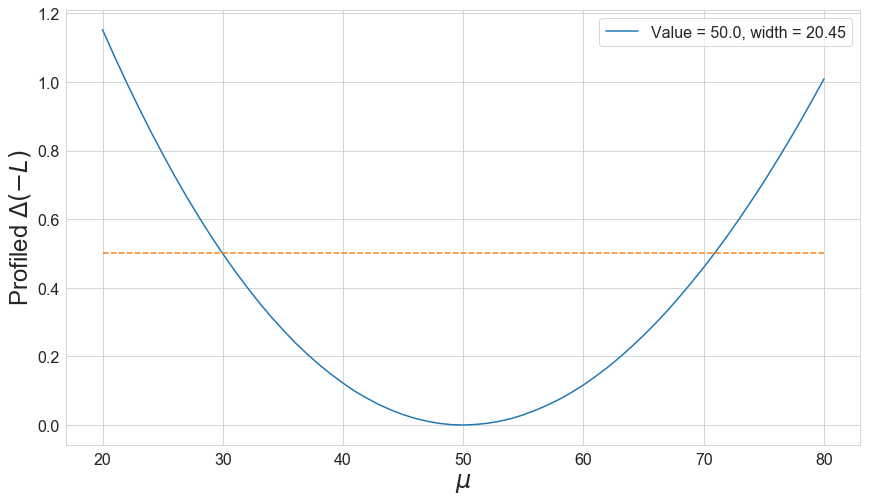

In [ ]:
plot_likelihood(nll-nll.min())

## BM 2

In [ ]:
nll = profiler(f_s=f_s, n_steps=100, **b_shapes)

In [ ]:
nll = to_np(nll)

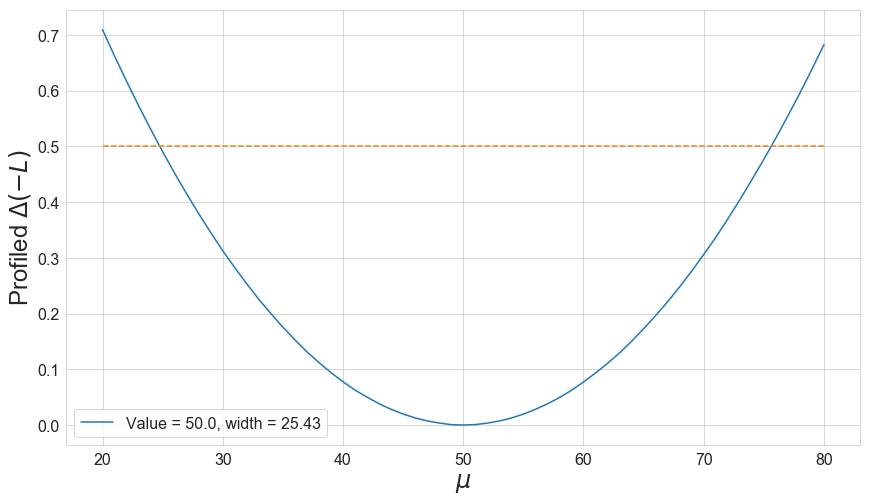

In [ ]:
plot_likelihood(nll-nll.min())